In [17]:
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    for indiv_count in range(len(dataframe)):
        if indiv_count%population_size == 0:
            #Summarizing the previous row.
            if indiv_count!=0:
                compressed_frame.loc[int(indiv_count/population_size)-1]/=population_size
            #Adding a new row for the next generation.
            compressed_frame.loc[int(indiv_count/population_size)]=[0 for n in range(len(dataframe.columns))]
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
            
    return compressed_frame
        

In [18]:
#Plotting Fitness

100


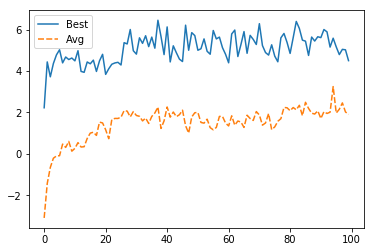

In [19]:

fitness_file = "../results_with_strong_health_imps/fitness_history.csv"
fitness_frame = pandas.read_csv(fitness_file, sep=" ", names=["Best", "Avg"])
print(len(fitness_frame))
sns.lineplot(data=fitness_frame)

    Generation  Best_Fitness  Median_Fitness    StdDev
0            0      2.227273       -3.773922  1.821379
1            1      4.437500       -1.428571  2.268745
2            2      4.437500       -0.682587  2.286770
3            3      4.437500       -0.394737  2.451111
4            4      4.777778       -0.095890  2.393041
5            5      5.022727        0.308442  2.224437
6            6      5.022727        0.804751  2.120678
7            7      5.022727        1.230769  2.613965
8            8      5.022727        1.253968  2.538761
9            9      5.022727        0.862006  2.472432
10          10      5.022727        1.373134  2.778985
11          11      5.022727        1.169046  2.337390
12          12      5.022727        1.000000  2.375822
13          13      5.022727        1.488462  2.472295
14          14      5.022727        1.558482  2.566691
15          15      5.022727        1.921798  2.509666
16          16      5.022727        1.640625  2.323509
17        

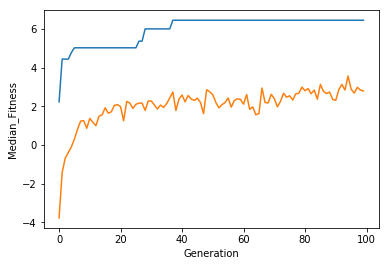

In [20]:
fitness_live_update_file = "../results_with_strong_health_imps/fitness_summary.csv"
fitness_frame = pandas.read_csv(fitness_live_update_file, sep=" ")
print(fitness_frame)
sns.lineplot(x='Generation', y='Best_Fitness', data=fitness_frame)
sns.lineplot(x='Generation', y='Median_Fitness', data=fitness_frame)

In [21]:
#Plotting NN outputs (that is, objective values) over generations.
nn_output_file = "../results_with_strong_health_imps/evolving_nn_outputs.csv"
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ", names=["Ammo","Health","Frags"])
#sns.lineplot(data=nn_out_frame)

#nn_out_frame[5500:10000]["o1"].mean()
summmary_nn_outputs=summarize_across_generations(nn_out_frame)

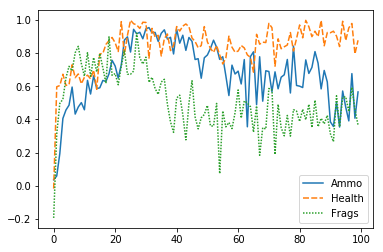

In [22]:
#Dropping the last row. Seems I got a few to many items?
summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
summmary_nn_outputs
sns.lineplot(data=summmary_nn_outputs)

In [ ]:
#Remember: 01-ammo, 02-health, 03-frags. 
#Quickly learns the 2 first are the most important.
#In other words: The problem is too simple - strategy does not need
#to depend on current state/measurements.

## Plot average fitness for the "standard" objective weights

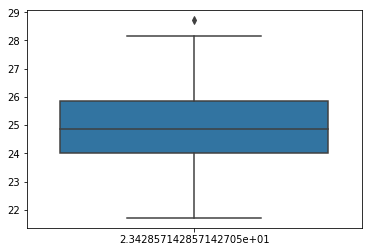

In [69]:
standard_average_rewards_file = "/home/kaiolae/code/DirectFuturePrediction/examples/D3_battle_randobj_pos_neg_pretrained/reward_stats.csv"
rewards_frame = pandas.read_csv(standard_average_rewards_file)
sns.boxplot(data=rewards_frame)

## Same plot for the difficult setting of the game

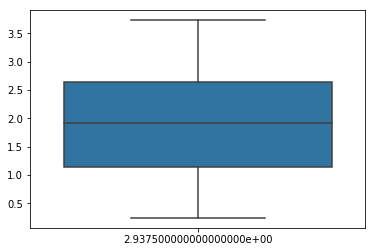

In [25]:
#Difficult: Enemies have 10* more health, player has 40% init. health,
#And death penalty =5.
standard_average_rewards_file = "/home/kaiolae/code/DirectFuturePrediction/examples/D3_battle_randobj_pos_neg_pretrained/results_with_healthier_monsters/reward_stats.csv"
rewards_frame = pandas.read_csv(standard_average_rewards_file)
sns.boxplot(data=rewards_frame)

## Performance of the hardcoded objective rules

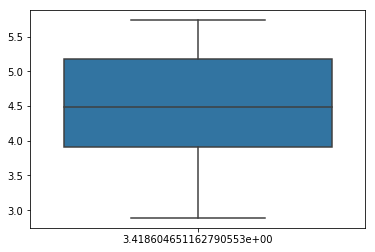

In [26]:
#Rules that use default objectives when health is high,
#but swaps to health only mode when health is low.
manual_obj_rewards_file = "/home/kaiolae/code/DirectFuturePrediction/examples/EvolvingExperiment/results_with_strong_health_imps/reward_stats_with_dummy_rules.csv"
rewards_frame = pandas.read_csv(manual_obj_rewards_file)
sns.boxplot(data=rewards_frame)

## Is Difference Significant?

In [28]:
#Hardcoded rules seems to give significantly higher fitnesses?
standard_average_rewards_file = "/home/kaiolae/code/DirectFuturePrediction/examples/D3_battle_randobj_pos_neg_pretrained/results_with_healthier_monsters/reward_stats.csv"
static_rules_fitnesses = pandas.read_csv(standard_average_rewards_file)
print(static_rules_fitnesses)

manual_obj_rewards_file = "/home/kaiolae/code/DirectFuturePrediction/examples/EvolvingExperiment/results_with_strong_health_imps/reward_stats_with_dummy_rules.csv"
dynamic_manual_rules_fitnesses = pandas.read_csv(manual_obj_rewards_file)
print(dynamic_manual_rules_fitnesses)

evolved_nn_fitnesses_file = "../results_with_strong_health_imps/reward_stats_with_evolved_nn.csv"
evolved_nn_fitnesses_frame = pandas.read_csv(evolved_nn_fitnesses_file)
print(evolved_nn_fitnesses_frame)

    2.937500000000000000e+00
0                   0.440000
1                   2.277778
2                   0.652174
3                   0.240000
4                   1.750000
5                   1.944444
6                   1.200000
7                   1.950000
8                   3.733333
9                   2.157895
10                  2.687500
11                  2.736842
12                  0.954545
13                  1.894737
14                  1.600000
15                  0.714286
16                  1.227273
17                  2.625000
18                  3.187500
19                  3.058824
    3.418604651162790553e+00
0                   4.195122
1                   3.604651
2                   3.756098
3                   4.162791
4                   3.487805
5                   5.384615
6                   5.594595
7                   2.909091
8                   5.052632
9                   5.736842
10                  2.888889
11                  4.333333
12            

In [29]:
import scipy.stats as st
print("Static vs Dynamic: ", st.mannwhitneyu(static_rules_fitnesses, dynamic_manual_rules_fitnesses))
print("Static vs Evolved: ", st.mannwhitneyu(static_rules_fitnesses, evolved_nn_fitnesses_frame))
print("Dynamic vs Evolved: ", st.mannwhitneyu(dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame))

Static vs Dynamic:  MannwhitneyuResult(statistic=8.0, pvalue=1.7008736382252074e-07)
Static vs Evolved:  MannwhitneyuResult(statistic=16.0, pvalue=5.442375698096838e-07)
Dynamic vs Evolved:  MannwhitneyuResult(statistic=123.0, pvalue=0.04804616472783665)


    4.088888888888888573e+00
0                   4.340909
1                   5.023810
2                   3.276596
3                   3.266667
4                   3.813953
5                   2.471698
6                   4.875000
7                   5.116279
8                   4.204545
9                   3.772727
10                  4.090909
11                  2.729167
12                  4.292683
13                  3.326087
14                  2.891304
15                  6.472222
16                  4.463415
17                  4.000000
18                  3.750000
    2.937500000000000000e+00  3.418604651162790553e+00  \
0                   0.440000                       NaN   
1                   2.277778                       NaN   
2                   0.652174                       NaN   
3                   0.240000                       NaN   
4                   1.750000                       NaN   
5                   1.944444                       NaN   
6             

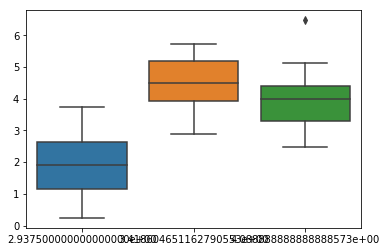

In [30]:
frames = [static_rules_fitnesses, dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame]
print(evolved_nn_fitnesses_frame)
concatenated = pandas.concat(frames, names = ["Static", "Dynamic", "Evolved"],sort=False)
sns.boxplot(data=concatenated)
print(concatenated)

In [ ]:
#Left: Agent that always follows same rule. Middle: Agent that goes for
#health only when injured. Right: EA found agent almost as good as the 
#hand-written dynamic rule.

#The way I test if EA works: Take the evolved objectives-choosing agent,
#Run it 20 times and collect fitness. Compare to the fitness of 20 
#runs of the static agent.
#Of course, later, I should evolve 20 agents as a better control.